In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from itertools import islice
import matplotlib.image as mpimg 

def convert_gray(image):
    height = image.shape[0]
    width = image.shape[1]
    r = 0.299
    g = 0.587
    b = 0.114
    grey = np.zeros((image.shape[0],image.shape[1]))

    for i in range(height): 
        for j in range(width): 
            grey[i][j] = (r*image[i][j][0] + g*image[i][j][1] + b*image[i][j][2])/3  
    
    return grey
#   return image[:,:,0:3].mean(axis=2)


def read_image(image_name):
    """
    Read image 
 
    Inputs:
    ----------------
        image_name   Image path 
 
    Output:
    ----------------
        img  Image as multi channel array
       """      
    img = mpimg.imread(image_name)
    #im_array = np.array(img)

    return img


def matrix_fft(pattern):
    """
    FFT of the input array
 
    Inputs:
    ----------------
        pattern   2D array
        
    Output:
    ----------------
        fft2   FFT of array

     """
    #Take FFt along columns, then rows       
    fft1 = np.fft.fft(pattern, axis = 0)
    fft2 = np.fft.fft(fft1, axis = 1)

    return fft2

def matrix_ifft(pattern):
    """
    IFFT of the input array
 
    Inputs:
    ----------------
        pattern   2D array
        
    Output:
    ----------------
        ifft2   FFT of array

     """  

    #Take IFFt along columns, then rows    
    ifft1 = np.fft.ifft(pattern, axis = 0)
    ifft2 = np.fft.ifft(ifft1, axis = 1)

    return ifft2


def matrix_complex_conj(pattern):
    """
    Complex of the input array
 
    Inputs:
    ----------------
        pattern   2D array
        
    Output:
    ----------------
        pattern_fft_conj   Complex conjugate of array

     """  

    pattern_fft_conj = np.conj(pattern)

    return pattern_fft_conj 



def zero_padding(C, x_pad, y_pad):
    """
    Zero pad 2D array by placing it in centre of zeroed matrix of padded size.
 
    Inputs:
    ----------------
        array   The array to pad
 
        padlen_x    Padwidth of the rows. Floats will be rounded up.
        
        padlen_y    Padwidth of the columns. Floats will be rounded up.
 
    Output:
    ----------------
        padded  Padded template array.  
     """        

    m,n = C.shape
    
    #needs to be int to work not float make this into a round up if float function or find libray function 
    if x_pad% 2 == 0:
        x_pad = int(x_pad)
    else: 
        x_pad = int( x_pad + 0.5 )

    if y_pad% 2 == 0:
        y_pad = int(y_pad)
    else: 
        y_pad = int( y_pad + 0.5 )
           
    c_y = np.zeros((m +2*x_pad , n+2*y_pad ),dtype=C.dtype)
    c_y[x_pad:-x_pad:, y_pad:-y_pad] = C
    return c_y
    
    
    # x_pad = int(np.round(x_pad))
    # y_pad = int(np.round(y_pad))
    
    # return np.pad(C, [(x_pad, ), (y_pad, )], mode='constant')


def nextpow2(n):

    """get the next power of 2 that's greater than n"""
    m_f = np.log2(n)
    m_i = np.ceil(m_f)

    return 2**m_i


def crr_2d( pattern, template):
    """
    Cross correlation of two 2D arrays using FFt to convolve spatial arrays
 
    Inputs:
    ----------------
        pattern   Pattern must be non empty 

        template   Template, search space with similar dimensionality to pattern
        
    Output:
    ----------------
        real_corr  Cross correlation array
     """  

    '''New padding'''
    a = pattern
    b = template

    if a.shape[0]%2!=0:
        w = a.shape[1]
        h = a.shape[0]
        a= np.ones( (h+1,w))

    if a.shape[1]%2!=0:
        w = a.shape[1]
        h = a.shape[0]
        a= np.ones( (h,w+1))

    if b.shape[0]%2!=0:
        w = b.shape[1]
        h = b.shape[0]
        b= np.ones( (h+1,w))

    if b.shape[1]%2!=0:
        w = b.shape[1]
        h = b.shape[0]
        b= np.ones( (h,w+1))

    min_height_pad = max(a.shape[0], b.shape[0])
    min_width_pad = max(a.shape[1], b.shape[1]) 
    # find closes power of 2 for height and width (np.fft runs faster) 
    optimal_width = nextpow2(min_width_pad) 
    optimal_height = nextpow2(min_height_pad) 

    height_pad_p = optimal_height - a.shape[0]
    width_pad_p = optimal_width - a.shape[1]
    height_pad_t = optimal_height - b.shape[0] 
    width_pad_t = optimal_width - b.shape[1] 

    # pad pattern as centre of array with zeros
    pattern_padded = zero_padding( a, height_pad_p /2, width_pad_p /2 ) 
    template_padded = zero_padding( b, height_pad_t /2, width_pad_t /2  )

    #testing
#     print("image shape = ", pattern.shape)
#     print("template shape = ", template.shape)
#     print("\nmin and optimal sizes ")
#     print(min_height_pad, min_width_pad) 
#     print(optimal_height, optimal_width)
#     print("difference for template padding extra height = ", height_pad_t)
#     print("difference for template padding extra width = ", width_pad_t)
#     print("padded shapes")
#     print("pattern_padded shape = ", pattern_padded.shape)
#     print("template_padded shape = ", template_padded.shape)


    # '''New padding'''
    # # get minimum width/height to pad for np.fft 
    # min_width_pad = max( pattern.shape[1], template.shape[1]) 
    # min_height_pad = max(pattern.shape[0], template.shape[0])
    # # find closes power of 2 for height and width (np.fft runs faster) 
    # optimal_width = nextpow2(min_width_pad) 
    # optimal_height = nextpow2(min_height_pad) 

    # # move into zero padding function
    # width_pad_p = optimal_width - pattern.shape[0] 
    # height_pad_p = optimal_height - pattern.shape[1]

    # width_pad_t = optimal_width - template.shape[0] 
    # height_pad_t = optimal_height - template.shape[1] 

    # # pad pattern as centre of array with zeros
    # pattern_padded = zero_padding( pattern, width_pad_p /2, height_pad_p /2 ) 
    # template_padded = zero_padding( template, width_pad_t /2, height_pad_t /2 )

    # template_fft = matrix_fft(template) #(a)
    # pattern_fft_conj = matrix_complex_conj( matrix_fft(pattern_padded) ) # (b)

    # # a * b
    # #Offset pattern due to padding
    # product = pattern_fft_conj[0: pattern_fft_conj.shape [0], 0: pattern_fft_conj.shape [1]] *  template   

    # '''Old padding'''
    # side_edge_pad = template.shape[0] - pattern.shape[0] # move into zero padding function
    # bottom_edge_pad = template.shape[1] - pattern.shape[1]

    # pattern_padded = zero_padding( pattern, side_edge_pad /2, bottom_edge_pad /2 ) # pad pattern as centre of array with zeros

    template_fft = matrix_fft(template_padded) #(a)
    pattern_fft_conj = matrix_complex_conj( matrix_fft(pattern_padded) ) # (b)

    # a * b
    #Offset pattern due to padding
    #product = pattern_fft_conj[0: pattern_fft_conj.shape [0], 0: pattern_fft_conj.shape [1]] *  template_padded      
    product = pattern_fft_conj *  template_padded      
    ccr = matrix_ifft(product)
    
    real_corr = np.real(ccr) #np.real

    return real_corr, height_pad_t, width_pad_t


#function that finds the largest element and its index in an array
def find_best_match(score):
    """
    Find max value in 2D array and its index
 
    Inputs:
    ----------------
        score   2D target array
        
    Output:
    ----------------
        index   Index of largest element 
        
        max_element Max Element in the array

     """      
    #try:
    max_element = np.amax(score)
    #except:
    #    print( "Line 45 Error", score )
    index = np.unravel_index(np.argmax( score, axis=None), score.shape) 
    #index = np.argmax(score)

    return index, max_element # tuple = list, int


def find_offset(pattern, template): 
    """
    2D array offset index and value from cross correlation 
 
    Inputs:
    ----------------
        pattern   Pattern must be non empty 

        template   Template, search space with similar dimensionality to pattern
        
    Output:
    ----------------
        (best_score, best_match)  Index of offset found from cross correlation
     """     

    #new adding
    real_corr, off_x, off_y = crr_2d( pattern, template)
    # real_corr = crr_2d( pattern, template) old padding

    best_match , match_value = find_best_match( real_corr )
    #print( best_match )

    # return (best_match[0] - 2 * pattern.shape[0], best_match[1] - 2 * pattern.shape[1]), match_value
    # return (best_match[0] - off_x/2, best_match[1] - off_y/2), match_value #last working

    #newest 
    mid_vert_co = best_match[0] - off_x/2 - 2*pattern.shape[0]
    mid_horiz_co = best_match[1] - off_y/2 - 2*pattern.shape[1]
    # mid_vert_co_2 = best_match[0] - pattern.shape[0]
    # mid_horiz_co_2 = best_match[1] - pattern.shape[1]
    # print("mid_vert = ", mid_vert_co)
    # print("mid_horz = ", mid_horiz_co)
    # print("mid_vert = ", mid_vert_co_2)
    # print("mid_horz = ", mid_horiz_co_2)
    
    return ( mid_vert_co, mid_horiz_co ), match_value




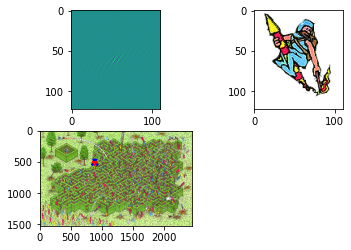

Offset_x_co =  884.5 Offset_y_co =  401.5 value = 0.0030103586135491753
run time =  1.8877170085906982


NameError: name 'image_mean_2' is not defined

In [9]:
def main():

    patternDir = "wallypuzzle_rocket_man.png"
    templateDir = "wallypuzzle_png.png"

    pattern_gray = convert_gray( np.array(read_image( patternDir ) ) )
    template_gray = convert_gray( np.array(read_image( templateDir ) ) )
    
    pattern_s = pattern_gray - np.mean(pattern_gray)
    template_s = template_gray - np.mean(template_gray)
        
    start = time.time()
    image_cross, image_cross_value = find_offset( pattern_s, template_s)
    end = time.time()

    #function to find image centre
    vertCen = pattern_gray.shape[1]/2
    horCen = pattern_gray.shape[0]/2
    
    
    #plot shift FFT of image
    plt.subplot(2,2,1)
    plt.imshow( np.fft.fftshift( np.imag(matrix_fft(pattern_gray)) ) ) 
    plt.subplot(2,2,2)
    plt.imshow( mpimg.imread( patternDir ) )
        
    plt.subplot(2,2,3)
    plt.imshow( mpimg.imread( templateDir ) )  
    circle=plt.Circle(( image_cross[1] - horCen ,\
    image_cross[0]+ vertCen),\
    50,facecolor='red', edgecolor='blue',linestyle='dotted', \
    linewidth='2.2')

    plt.gca().add_patch(circle)  
    plt.show()    
    
    print("Offset_x_co = ", image_cross[1] - horCen , "Offset_y_co = ", image_cross[0] - vertCen, "value =", image_cross_value)
    print("run time = ", end - start )

    plt.ion()

    
    
    
    
    pattern_image = read_image( patternDir )
    template_image = read_image( templateDir ) 
    
    test_plot = image_mean_2[ (image_cross[1] - image_mean_1.shape[0]) : (image_cross[1]+image_mean_1.shape[0]),\
                             (image_cross[0]-image_mean_1.shape[1]): (image_cross[0]+image_mean_1.shape[1]) ]
    plt.imshow( test_plot )
    

#     print("Offset_x_co = ", image_cross[0]+( image_mean_1.shape[0] / 2), "Offset_y_co = ", \
#           image_cross[1]+( image_mean_1.shape[1] / 2) )

#     test_plot = template_image[ image_cross[0] : image_cross[0] + pattern_image.shape[0],  image_cross[1] : image_cross[1] + pattern_image.shape[1], : ] 
#     plt.imshow( test_plot )




if __name__ == '__main__':
    
    main()

"""
Offset_x =  528 Offset_y =  982 value = 0.520092887633342
<class 'numpy.ndarray'>
"""




In [292]:
patternDir = "wallypuzzle_rocket_man.png"
templateDir = "wallypuzzle_png.png"

pattern_gray = convert_gray( read_image( patternDir ) )
template_gray = convert_gray( read_image( templateDir ) )

pattern_s = pattern_gray - np.mean(pattern_gray)
template_s = template_gray - np.mean(template_gray)

IndexError: index 111 is out of bounds for axis 0 with size 111

In [293]:
#n_cor function
a = pattern_s
b = template_s



if a.shape[0]%2!=0:
#     w = a.shape[1]
#     h = a.shape[0]
#     #a= np.ones( (h+1,w))
#     a1 = np.zeros((h+1,w))
#     #a[:-1,:] = pattern_gray
    a = np.vstack((a,np.zeros( (1,a.shape[1])  )))

if a.shape[1]%2!=0:
#     w = a.shape[1]
#     h = a.shape[0]
#     #a= np.ones( (h,w+1))
#     a1 = np.zeros((h,w+1))
    a = np.hstack((a,np.zeros( (a.shape[0],1) )))

if b.shape[0]%2!=0:
#     w = b.shape[1]
#     h = b.shape[0]
#     #b= np.ones( (h+1,w))
#     b1 = np.zeros((h+1,w))
    b = np.vstack((b,np.zeros( (1,b.shape[1]) )))
    
if b.shape[1]%2!=0:
#     w = b.shape[1]
#     h = b.shape[0]
#     #b= np.ones( (h,w+1))
#     b1 = np.zeros((h,w+1))
    b = np.hstack((b,np.zeros( (b.shape[0],1) )))

# pattern_gray = a
# template_gray = b   

min_height_pad = max(a.shape[0], b.shape[0])
min_width_pad = max(a.shape[1], b.shape[1]) 
# find closes power of 2 for height and width (np.fft runs faster) 
optimal_width = nextpow2(min_width_pad) 
optimal_height = nextpow2(min_height_pad) 

height_pad_p = optimal_height - a.shape[0]
width_pad_p = optimal_width - a.shape[1]
height_pad_t = optimal_height - b.shape[0] 
width_pad_t = optimal_width - b.shape[1] 

pattern_gray = a
template_gray = b  

# pad pattern as centre of array with zeros
pattern_padded = zero_padding( pattern_gray, height_pad_p /2, width_pad_p /2 ) 
template_padded = zero_padding( template_gray, height_pad_t /2, width_pad_t /2  )

#testing
print("image shape = ", pattern.shape)
print("template shape = ", template.shape)

print("\nmin and optimal sizes ")
print(min_height_pad, min_width_pad) 
print(optimal_height, optimal_width)
print("difference for template padding extra height = ", height_pad_t)
print("difference for template padding extra width = ", width_pad_t)
print("padded shapes")
print("pattern_padded shape = ", pattern_padded.shape)
print("template_padded shape = ", template_padded.shape)

image shape =  (123, 111)
template shape =  (1526, 2446)

min and optimal sizes 
1526 2446
2048.0 4096.0
difference for template padding extra height =  522.0
difference for template padding extra width =  1650.0
padded shapes
pattern_padded shape =  (2048, 4096)
template_padded shape =  (2048, 4096)


(2048, 4096)


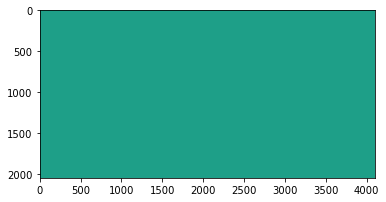

In [287]:
template_fft = matrix_fft(template_padded) #(a)
pattern_fft_conj = matrix_complex_conj( matrix_fft(pattern_padded) ) # (b)

# print("pattern_padded_fft shape = ", pattern_fft_conj.shape)
# print("template_padded_fft shape = ", template_fft.shape)

# a * b
#Offset pattern due to padding
product = pattern_fft_conj *  template_padded  
# print("product shape = ", product.shape)
ccr = matrix_ifft(product)
# print("ccr shape = ", ccr.shape)
real_corr = np.real(ccr) #np.real
# print("real_corr shape = ", real_corr.shape)
print(ccr.shape)
plt.imshow(real_corr)

In [288]:
score = real_corr 
#find_best function
max_element = np.amax(score)
# print("max_element = ",max_element)
index = np.unravel_index(np.argmax( score, axis=None), score.shape) 
print("index = ", index)

index =  (1043, 2062)


In [289]:
best_match = index
match_value = max_element
#return of find off set function, make cnetre of cross correlation
mid_vert_co = best_match[0] - height_pad_t/2 - 2*pattern.shape[0]
mid_horiz_co = best_match[1] - width_pad_t/2 - 2*pattern.shape[1]
# mid_vert_co_2 = best_match[0] - pattern.shape[0]
# mid_horiz_co_2 = best_match[1] - pattern.shape[1]
print("mid_horz = ", mid_horiz_co)
print("mid_vert = ", mid_vert_co)
# print("mid_vert = ", mid_vert_co_2)
# print("mid_horz = ", mid_horiz_co_2)

'''
Pattern_x_co =  982 
Pattern_y_co =  528 
'''
print("difference x_co =", 982 - mid_horiz_co )
print("difference y_co =", 528 -mid_vert_co )

mid_horz =  1015.0
mid_vert =  536.0
difference x_co = -33.0
difference y_co = -8.0


In [290]:
real_corr, off_x, off_y = crr_2d( pattern, template)
# real_corr = crr_2d( pattern, template) old padding

best_match , match_value = find_best_match( real_corr )
#print( best_match )

# return (best_match[0] - 2 * pattern.shape[0], best_match[1] - 2 * pattern.shape[1]), match_value
return (best_match[0] - off_x/2, best_match[1] - off_y/2), match_value

SyntaxError: 'return' outside function (<ipython-input-290-847ea19c85f8>, line 8)

(1526, 2446, 4)


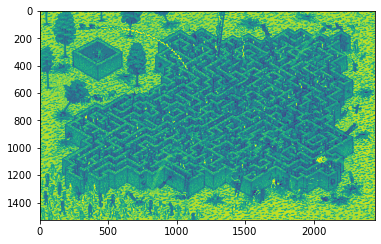

In [295]:
import matplotlib
image = read_image( patternDir )

print(image.shape)

# Intialize a new array of zeroes with the same shape
grey = np.zeros((image.shape[0],image.shape[1]));
grey2 = np.zeros((image.shape[0],image.shape[1]));

# 'Human' Average - adapted for human eyes
def average1(pixel):
    return (0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2])/3

# Raw Average 
def average2(pixel):
    return np.average(pixel);

# Map averages of pixels to the grey image
for r in range(len(image)): 
    for c in range(len(image[r])): 
        # Use human average
        grey[r][c] = average1(image[r][c]);

plt.imshow(grey) 
plt.show()

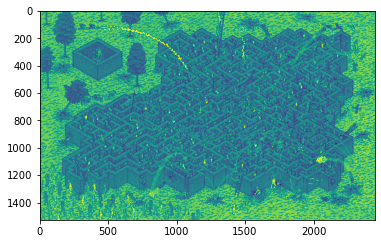

In [296]:
plt.imshow(image[:,:,0:3].mean(axis=2))

In [297]:
print(image.shape)

(1526, 2446, 4)


1526


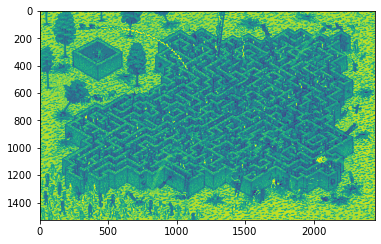

In [299]:
image = np.array(read_image( templateDir ) )
height = image.shape[0]
width = image.shape[1]
r = 0.299
g = 0.587
b = 0.114

for i in range(height): 
    for j in range(width): 
        grey[i][j] = (r*image[i][j][0] + g*image[i][j][1] + b*image[i][j][2])/3
        

print(len(image))
plt.imshow(grey) 
plt.show()

In [ ]:
grey_t = grey - np.mean(grey)


In [ ]:
plt.imshow(grey_t) 
plt.show()
comparison = grey == grey_t
equal_arrays = comparison.all()

print(equal_arrays)